## MODELO DE PREDICCION 

In [289]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import wbgapi as wb

In [ ]:
# Crear CSV para entrenamiento y modelo
Exp=wb.data.DataFrame(["SP.ADO.TFRT",
"SP.DYN.CBRT.IN",
"SH.XPD.CHEX.GD.ZS",
"SH.XPD.CHEX.PC.CD",
"SP.DYN.TFRT.IN",
"SP.DYN.LE00.IN",
"SP.DYN.IMRT.IN",
"SP.POP.GROW",
"SP.POP.TOTL",
"SH.STA.SUIC.P5",
"NY.GDP.MKTP.KD",
"NY.GDP.MKTP.KN"],"PER",range(2010,2020,1))

In [ ]:
Exf=Exp.transpose()

Ex=Exf.rename(index={"YR1990":"1990","YR1991":"1991","YR1992":"1992","YR1993":"1993","YR1994":"1994","YR1995":"1995","YR1996":"1996","YR1997":"1997","YR1998":"1998","YR1999":"1999","YR2000":"2000","YR2001":"2001","YR2002":"2002","YR2003":"2003","YR2004":"2004","YR2005":"2005","YR2006":"2006","YR2007":"2007","YR2008":"2008","YR2009":"2009","YR2010":"2010","YR2011":"2011","YR2012":"2012","YR2013":"2013","YR2014":"2014","YR2015":"2015","YR2016":"2016","YR2017":"2017","YR2018":"2018","YR2019":"2019","YR2020":"2020","YR2021":"2021"})
Ex.index=Ex.index.map(int)

In [ ]:
Ex.to_csv("Peru2.csv",index=False)

In [227]:
data = pd.read_csv("Peru2.csv")

In [228]:
data

,NY.GDP.MKTP.KD,NY.GDP.MKTP.KN,SH.STA.SUIC.P5,SH.XPD.CHEX.GD.ZS,SH.XPD.CHEX.PC.CD,SP.ADO.TFRT,SP.DYN.CBRT.IN,SP.DYN.IMRT.IN,SP.DYN.LE00.IN,SP.DYN.TFRT.IN,SP.POP.GROW,SP.POP.TOTL
0,1.503007e+11,3.820810e+11,3.5,4.715487,241.928696,66.0112,20.621,15.3,74.410,2.546,0.812926,29027680.0
1,1.598105e+11,4.062560e+11,3.3,4.533416,264.885040,64.1646,20.109,14.6,74.697,2.493,0.811896,29264314.0
2,1.696225e+11,4.311990e+11,3.2,4.740239,309.847382,62.3180,19.617,13.9,74.981,2.441,0.825158,29506790.0
3,1.795496e+11,4.564350e+11,3.1,4.760352,323.165527,61.2308,19.185,13.3,75.258,2.394,0.901465,29773986.0
4,1.838268e+11,4.673080e+11,2.9,4.978508,334.687317,60.1436,18.827,12.7,75.529,2.355,1.057019,30090372.0
5,1.898053e+11,4.825060e+11,2.7,4.979630,312.721710,59.0564,18.544,12.2,75.792,2.323,1.256159,30470739.0
6,1.973089e+11,5.015810e+11,2.6,4.972741,313.517181,57.9692,18.323,11.7,76.044,2.297,1.483157,30926036.0
7,2.022788e+11,5.142150e+11,2.7,4.917768,334.823334,56.8820,18.134,11.2,76.286,2.275,1.661928,31444299.0
8,2.103080e+11,5.346260e+11,2.8,5.197577,365.863831,55.9518,17.949,10.7,76.516,2.254,1.718268,31989265.0
9,2.150202e+11,5.466050e+11,2.8,5.215069,370.109955,55.0216,17.756,10.3,76.736,2.233,1.616157,32510462.0


In [229]:
#Buscamos si tenemos instancias duplicadas. Esto lo hacemos de la siguiente manera.
data[data.duplicated()]

,NY.GDP.MKTP.KD,NY.GDP.MKTP.KN,SH.STA.SUIC.P5,SH.XPD.CHEX.GD.ZS,SH.XPD.CHEX.PC.CD,SP.ADO.TFRT,SP.DYN.CBRT.IN,SP.DYN.IMRT.IN,SP.DYN.LE00.IN,SP.DYN.TFRT.IN,SP.POP.GROW,SP.POP.TOTL


In [230]:
print('La cantidad de registros duplicados es:', data.duplicated().sum())

La cantidad de registros duplicados es: 0


#### 1. Revisemos  los valores faltantes,

    No tenemos valores faltantes pero lo hare esta vez  para cumplir la consigna.

In [231]:
#pip install missingno 

import missingno as msno

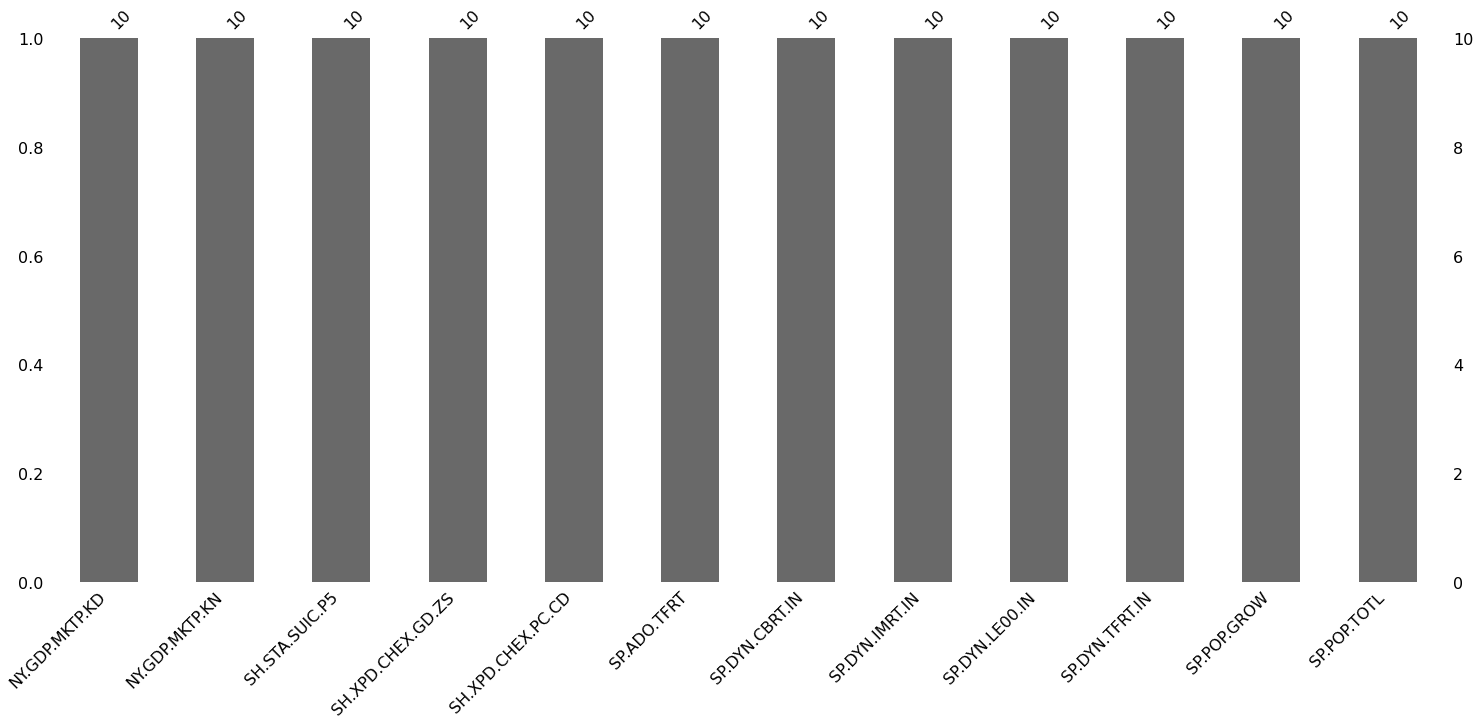

In [232]:
msno.bar(data)
plt.show()

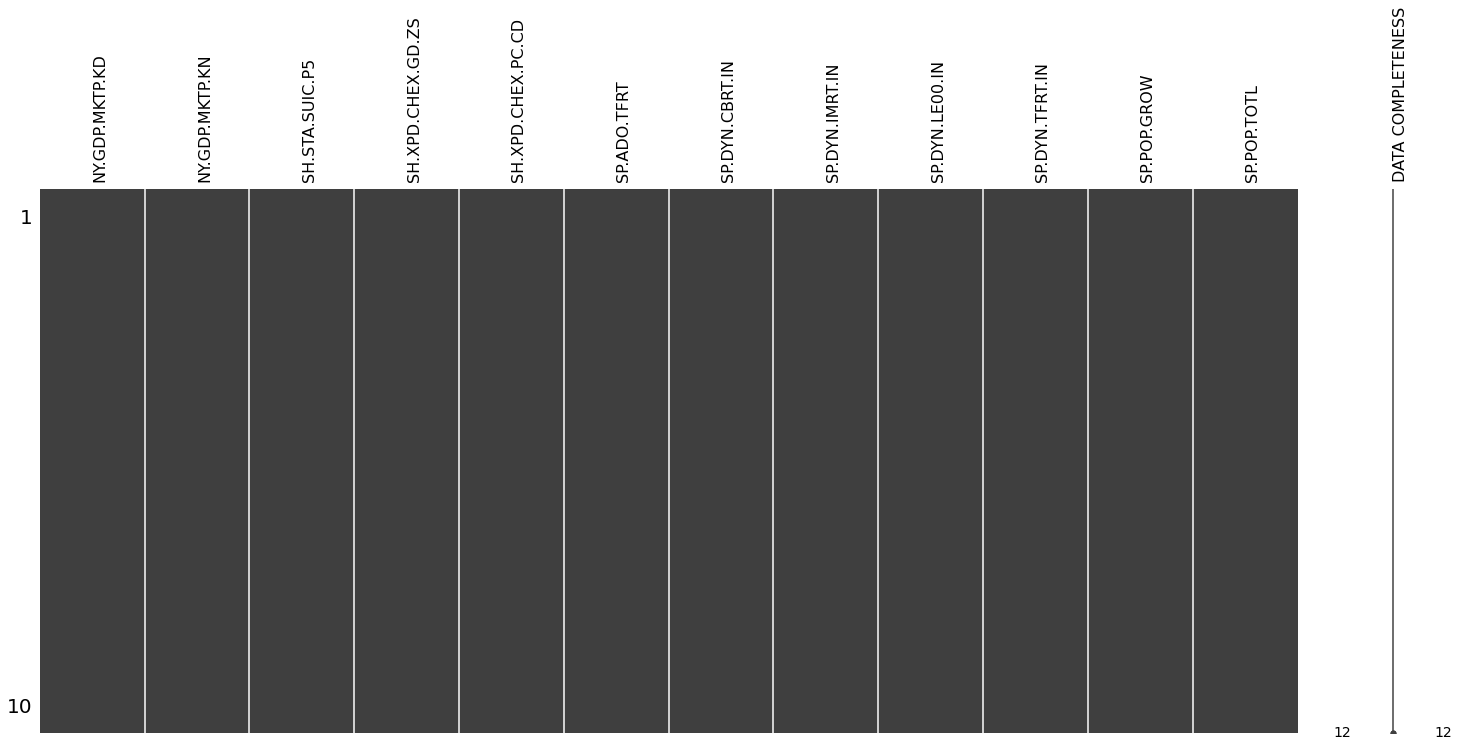

In [233]:
# Tomamos 10 muestras al azar de nuestra población

msno.matrix(data.sample(10), labels = True, label_rotation = 90)
plt.show()

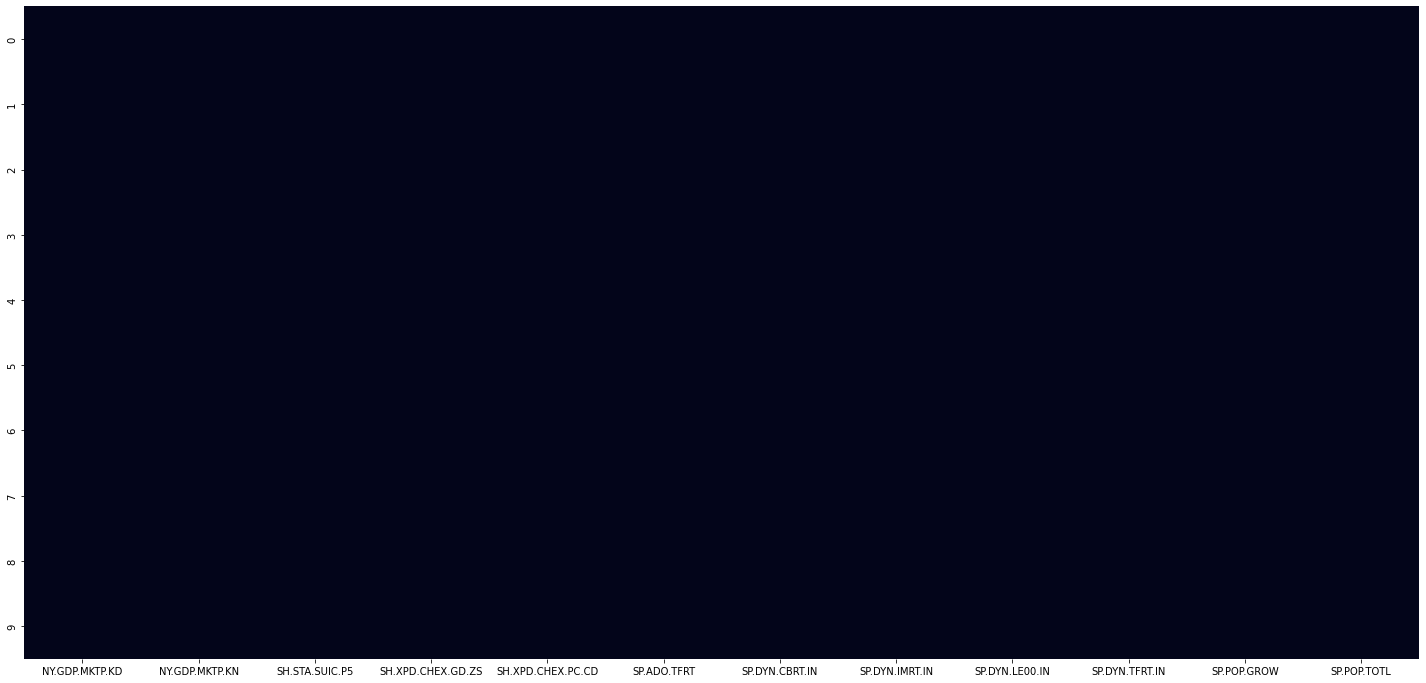

In [234]:
# Otra forma de visualizar la matriz con seaborn

plt.figure(figsize= (25,12))
sns.heatmap(data.isnull(), cbar=False)
plt.show()

No definimos la estrategia que usaremos para la imputación. En este caso, por que no lo necesitamos

# Escalado/normalización (Para este método, usamos MinMaxScaler de Scikit-learn)

 Escalamos todas las variables numericas

In [235]:
# importamos StandarScaler

from sklearn.preprocessing import StandardScaler

# GDP(constant 2015 US$)

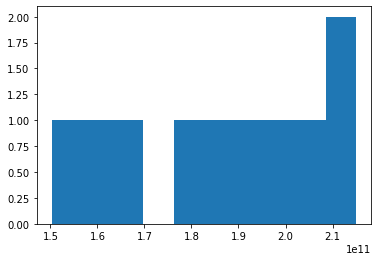

In [236]:
# Trabajaremos con la variable (constant 2015 US$). Veamos su distribución

plt.hist(data['NY.GDP.MKTP.KD']) 
plt.show()

In [237]:
# Escalamos (constant 2015 US$)

scaler = StandardScaler()

scaler.fit(data[['NY.GDP.MKTP.KD']])

data['NY.GDP.MKTP.KD'] = scaler.transform(data[['NY.GDP.MKTP.KD']])

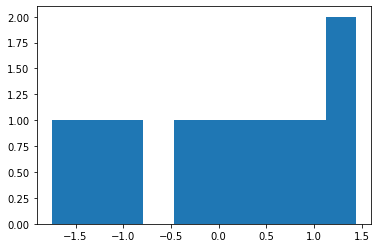

In [238]:
# Observamos cómo quedó la distribución luego de escalar

plt.hist(data['NY.GDP.MKTP.KD']) 
plt.show()

# GDP(constant LCU)

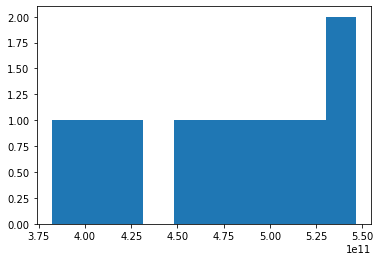

In [239]:
# Trabajaremos con la variable (constant LCU). Veamos su distribución

plt.hist(data['NY.GDP.MKTP.KN']) 
plt.show()

In [240]:
# Escalamos (constant LCU)

scaler = StandardScaler()

scaler.fit(data[['NY.GDP.MKTP.KN']])

data["NY.GDP.MKTP.KN"] = scaler.transform(data[['NY.GDP.MKTP.KN']])

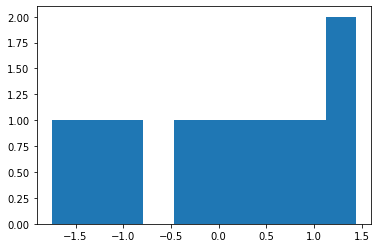

In [241]:
# Observamos cómo quedó la distribución luego de escalar

plt.hist(data['NY.GDP.MKTP.KN']) 
plt.show()

## Suicide mortality rate (per 100,000 population)

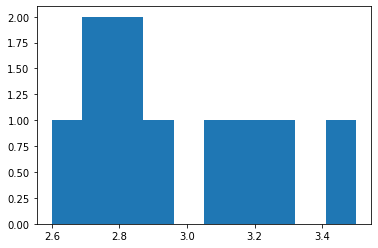

In [242]:
# Trabajaremos con la variable Suicide mortality rate (per 100,000 population). Veamos su distribución

plt.hist(data['SH.STA.SUIC.P5']) 
plt.show()

In [243]:
# Escalamos Suicide mortality rate (per 100,000 population)

scaler = StandardScaler()

scaler.fit(data[['SH.STA.SUIC.P5']])

data["SH.STA.SUIC.P5"] = scaler.transform(data[['SH.STA.SUIC.P5']])

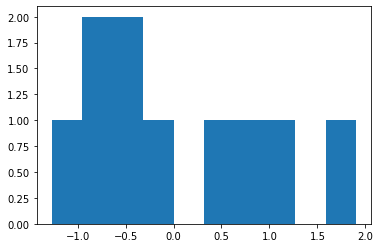

In [244]:
# Observamos cómo quedó la distribución luego de escalar

plt.hist(data['SH.STA.SUIC.P5']) 
plt.show()

## Current health expenditure (% of GDP)

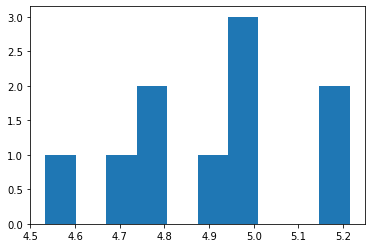

In [245]:
# Trabajaremos con la variable Customer_care_calls. Veamos su distribución

plt.hist(data['SH.XPD.CHEX.GD.ZS']) 
plt.show()

In [246]:
# Escalamos Customer_care_calls

scaler = StandardScaler()

scaler.fit(data[['SH.XPD.CHEX.GD.ZS']])

data["SH.XPD.CHEX.GD.ZS"] = scaler.transform(data[['SH.XPD.CHEX.GD.ZS']])

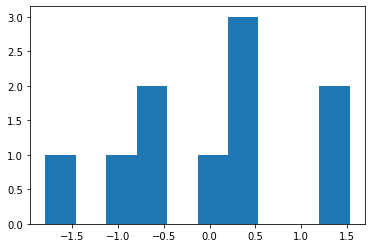

In [247]:
# Observamos cómo quedó la distribución luego de escalar

plt.hist(data['SH.XPD.CHEX.GD.ZS']) 
plt.show()

## Current health expenditure per capita (current US$)

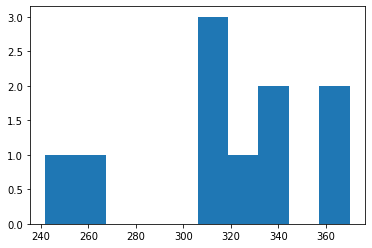

In [248]:
# Trabajaremos con la variable Current health expenditure per capita (current US$). Veamos su distribución

plt.hist(data['SH.XPD.CHEX.PC.CD']) 
plt.show()

In [249]:
# Escalamos Current health expenditure per capita (current US$)

scaler = StandardScaler()

scaler.fit(data[['SH.XPD.CHEX.PC.CD']])

data["SH.XPD.CHEX.PC.CD"] = scaler.transform(data[['SH.XPD.CHEX.PC.CD']])

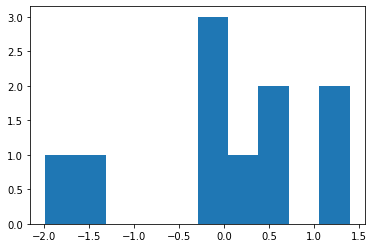

In [250]:
# Observamos cómo quedó la distribución luego de escalar

plt.hist(data['SH.XPD.CHEX.PC.CD']) 
plt.show()

## Adolescent fertility rate (births per 1,000 women ages 15-19)

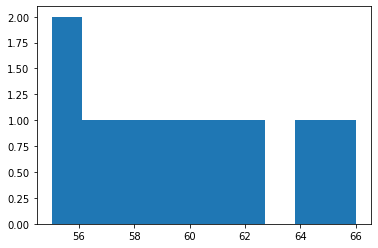

In [251]:
# Trabajaremos con la variable Adolescent fertility rate (births per 1,000 women ages 15-19). Veamos su distribución

plt.hist(data['SP.ADO.TFRT']) 
plt.show()

In [252]:
# Escalamos Adolescent fertility rate (births per 1,000 women ages 15-19)

scaler = StandardScaler()

scaler.fit(data[['SP.ADO.TFRT']])

data["SP.ADO.TFRT"] = scaler.transform(data[['SP.ADO.TFRT']])

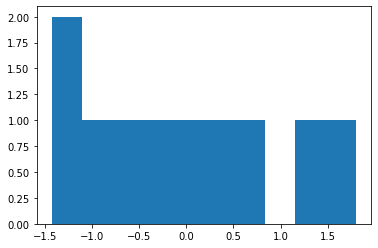

In [253]:
# Observamos cómo quedó la distribución luego de escalar

plt.hist(data['SP.ADO.TFRT']) 
plt.show()

## Birth rate, crude (per 1000 people)

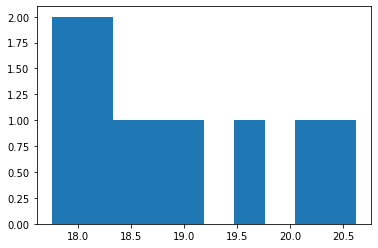

In [254]:
# Trabajaremos con la variable Birth rate, crude (per 1000 people). Veamos su distribución

plt.hist(data['SP.DYN.CBRT.IN']) 
plt.show()

In [255]:
# Escalamos Birth rate, crude (per 1000 people)

scaler = StandardScaler()

scaler.fit(data[['SP.DYN.CBRT.IN']])

data["SP.DYN.CBRT.IN"] = scaler.transform(data[['SP.DYN.CBRT.IN']])

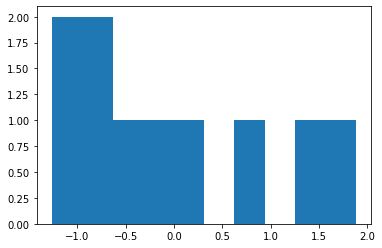

In [256]:
# Observamos cómo quedó la distribución luego de escalar

plt.hist(data['SP.DYN.CBRT.IN']) 
plt.show()

## Mortality rate, infant (per 1,000 live births)

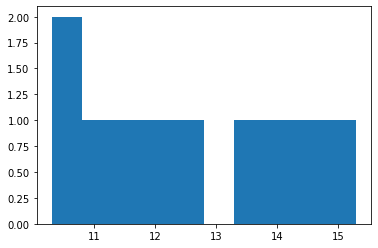

In [257]:
# Trabajaremos con la variable Mortality rate, infant (per 1,000 live births). Veamos su distribución

plt.hist(data['SP.DYN.IMRT.IN']) 
plt.show()

In [258]:
# Escalamos Mortality rate, infant (per 1,000 live births)

scaler = StandardScaler()

scaler.fit(data[['SP.DYN.IMRT.IN']])

data["SP.DYN.IMRT.IN"] = scaler.transform(data[['SP.DYN.IMRT.IN']])

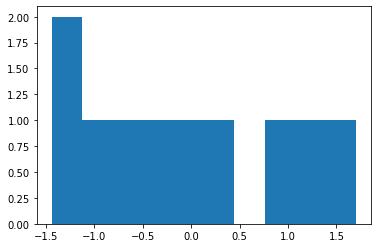

In [259]:
# Observamos cómo quedó la distribución luego de escalar

plt.hist(data['SP.DYN.IMRT.IN']) 
plt.show()

## Fertility rate, total (births per woman)

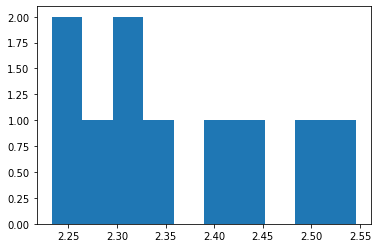

In [260]:
# Trabajaremos con la variable Fertility rate, total (births per woman). Veamos su distribución

plt.hist(data['SP.DYN.TFRT.IN']) 
plt.show()

In [261]:
# Escalamos Fertility rate, total (births per woman)

scaler = StandardScaler()

scaler.fit(data[['SP.DYN.TFRT.IN']])

data["SP.DYN.TFRT.IN"] = scaler.transform(data[['SP.DYN.TFRT.IN']])

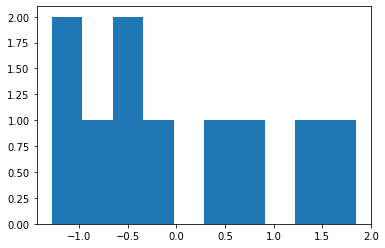

In [262]:
# Observamos cómo quedó la distribución luego de escalar

plt.hist(data['SP.DYN.TFRT.IN']) 
plt.show()

## Population growth (annual %)

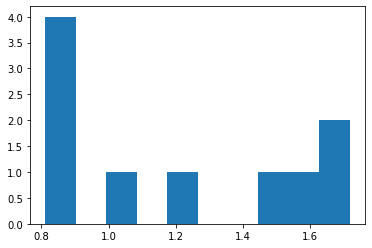

In [263]:
# Trabajaremos con la variable Population growth (annual %). Veamos su distribución

plt.hist(data['SP.POP.GROW']) 
plt.show()

In [264]:
# Escalamos Population growth (annual %)

scaler = StandardScaler()

scaler.fit(data[['SP.POP.GROW']])

data["SP.POP.GROW"] = scaler.transform(data[['SP.POP.GROW']])

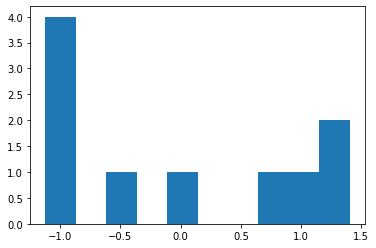

In [265]:
# Observamos cómo quedó la distribución luego de escalar

plt.hist(data['SP.POP.GROW']) 
plt.show()

## Population, total

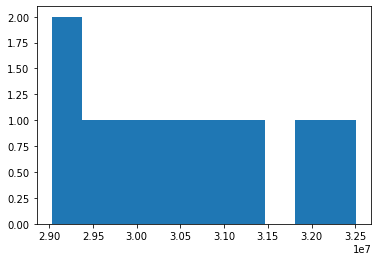

In [266]:
# Trabajaremos con la variable Population, total. Veamos su distribución

plt.hist(data['SP.POP.TOTL']) 
plt.show()

In [267]:
# Escalamos Population, total

scaler = StandardScaler()

scaler.fit(data[['SP.POP.TOTL']])

data["SP.POP.TOTL"] = scaler.transform(data[['SP.POP.TOTL']])

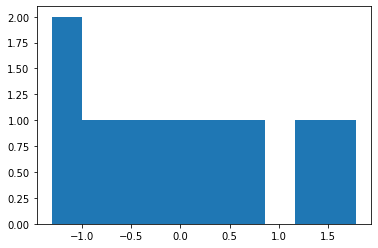

In [268]:
# Observamos cómo quedó la distribución luego de escalar

plt.hist(data['SP.POP.TOTL']) 
plt.show()

# Correlacion de variables

In [269]:
import seaborn as sn

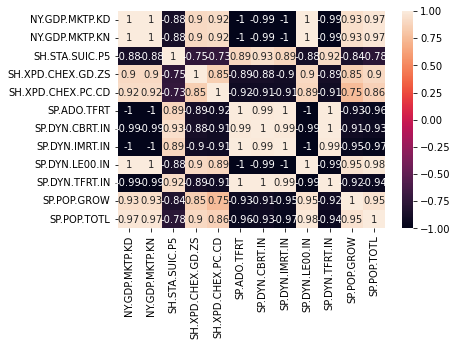

In [270]:
cordata=data.corr().round(2)
sn.heatmap(cordata,annot=True)
plt.show()

#### Aqui un poco mas grande usando matplotlib 

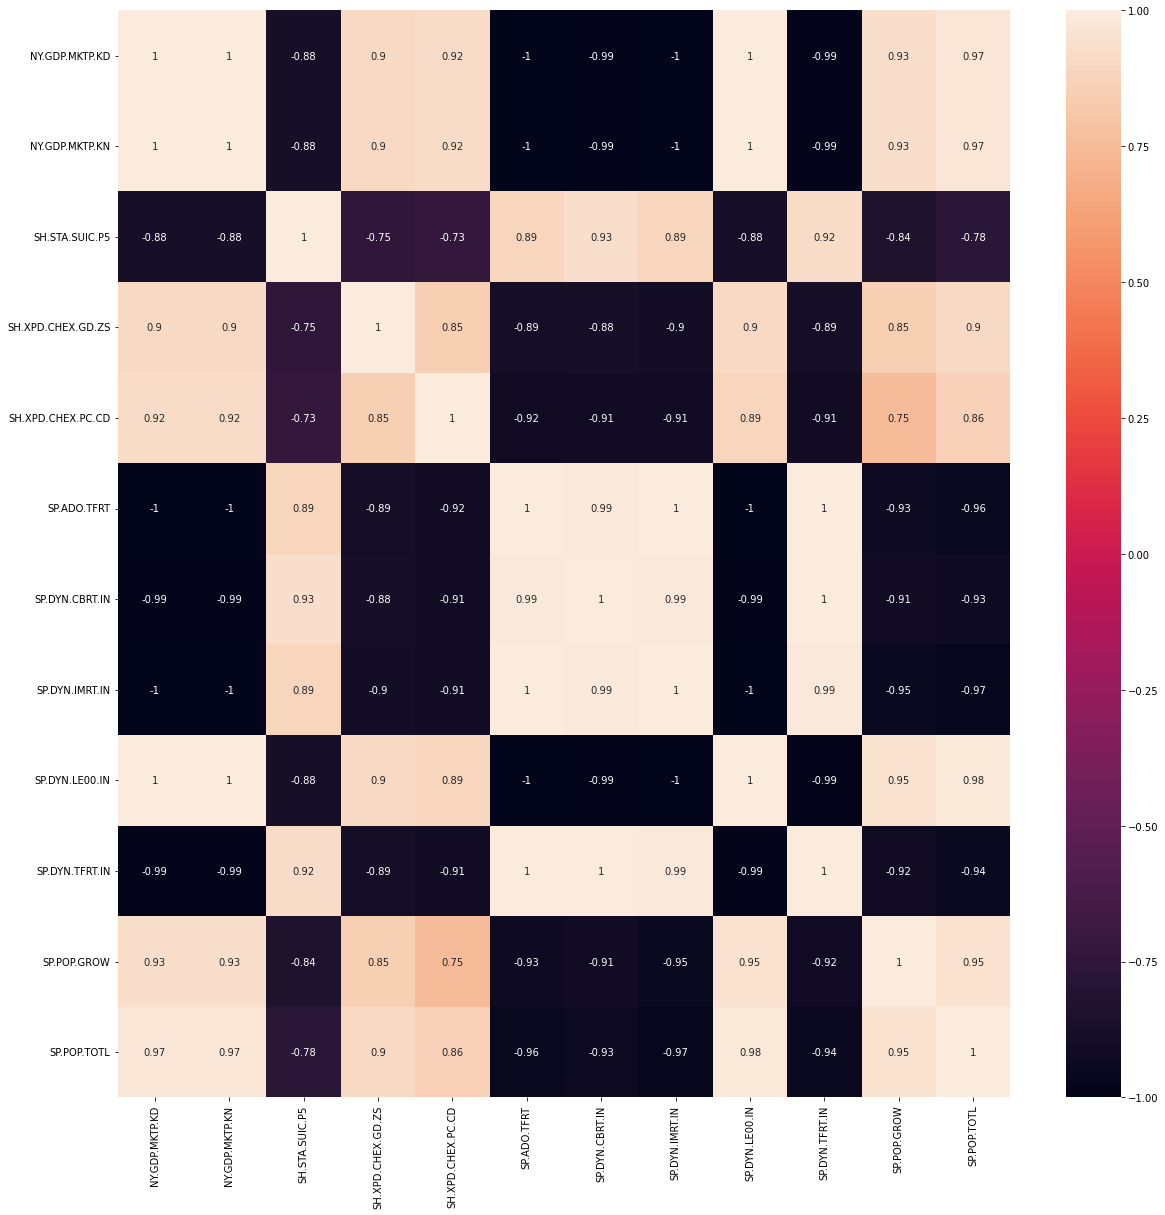

In [271]:
fig,ax=plt.subplots(figsize=(20,20))
sn.heatmap(cordata,annot=True)
plt.show()

## Simulamos Random Forest generando muestreos

Usare RandomForestRegressor para mi modelo predictorio

### Paso 1

In [272]:
#imprimo un muestro usando 2/3 de los datos
print(data.sample(frac=2/3))

   NY.GDP.MKTP.KD  NY.GDP.MKTP.KN  SH.STA.SUIC.P5  SH.XPD.CHEX.GD.ZS  \
8        1.209010        1.209010       -0.564276           1.447844   
5        0.198283        0.198283       -0.916949           0.383578   
3       -0.307295       -0.307295        0.493742          -0.687190   
9        1.441311        1.441311       -0.564276           1.533256   
6        0.568191        0.568191       -1.269622           0.349937   
2       -0.796679       -0.796679        0.846415          -0.785405   
0       -1.749191       -1.749191        1.904433          -0.906268   

   SH.XPD.CHEX.PC.CD  SP.ADO.TFRT  SP.DYN.CBRT.IN  SP.DYN.IMRT.IN  \
8           1.287626    -1.151176       -1.052052       -1.188022   
5          -0.117195    -0.240181       -0.398296       -0.245147   
3           0.158889     0.397861        0.306001        0.446294   
9           1.399872    -1.424128       -1.264110       -1.439455   
6          -0.096166    -0.559203       -0.641120       -0.559439   
2        

### simulacion  + bootstrap

In [273]:
print(data.sample(frac=2/3,replace=True))

   NY.GDP.MKTP.KD  NY.GDP.MKTP.KN  SH.STA.SUIC.P5  SH.XPD.CHEX.GD.ZS  \
0       -1.749191       -1.749191        1.904433          -0.906268   
6        0.568191        0.568191       -1.269622           0.349937   
5        0.198283        0.198283       -0.916949           0.383578   
4       -0.096442       -0.096442       -0.211604           0.378097   
6        0.568191        0.568191       -1.269622           0.349937   
8        1.209010        1.209010       -0.564276           1.447844   
8        1.209010        1.209010       -0.564276           1.447844   

   SH.XPD.CHEX.PC.CD  SP.ADO.TFRT  SP.DYN.CBRT.IN  SP.DYN.IMRT.IN  \
0          -1.988619     1.800592        1.883804        1.703459   
6          -0.096166    -0.559203       -0.641120       -0.559439   
5          -0.117195    -0.240181       -0.398296       -0.245147   
4           0.463470     0.078840       -0.087351        0.069144   
6          -0.096166    -0.559203       -0.641120       -0.559439   
8        

# Creación de Bosque Aleatorio de Regresion(RandomForestRegressor)

In [274]:
import numpy as np
from sklearn import svm
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
import sklearn
from sklearn.ensemble import RandomForestRegressor

In [275]:
data.head()

,NY.GDP.MKTP.KD,NY.GDP.MKTP.KN,SH.STA.SUIC.P5,SH.XPD.CHEX.GD.ZS,SH.XPD.CHEX.PC.CD,SP.ADO.TFRT,SP.DYN.CBRT.IN,SP.DYN.IMRT.IN,SP.DYN.LE00.IN,SP.DYN.TFRT.IN,SP.POP.GROW,SP.POP.TOTL
0,-1.749191,-1.749191,1.904433,-0.906268,-1.988619,1.800592,1.883804,1.703459,74.410,1.849528,-1.119160,-1.306312
1,-1.280382,-1.280382,1.199088,-1.795347,-1.381764,1.258737,1.321245,1.263451,74.697,1.319377,-1.122030,-1.096415
2,-0.796679,-0.796679,0.846415,-0.785405,-0.193178,0.716882,0.780661,0.823443,74.981,0.799228,-1.085062,-0.881337
3,-0.307295,-0.307295,0.493742,-0.687190,0.158889,0.397861,0.306001,0.446294,75.258,0.329094,-0.872354,-0.644331
4,-0.096442,-0.096442,-0.211604,0.378097,0.463470,0.078840,-0.087351,0.069144,75.529,-0.061017,-0.438741,-0.363694


In [276]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   NY.GDP.MKTP.KD     10 non-null     float64
 1   NY.GDP.MKTP.KN     10 non-null     float64
 2   SH.STA.SUIC.P5     10 non-null     float64
 3   SH.XPD.CHEX.GD.ZS  10 non-null     float64
 4   SH.XPD.CHEX.PC.CD  10 non-null     float64
 5   SP.ADO.TFRT        10 non-null     float64
 6   SP.DYN.CBRT.IN     10 non-null     float64
 7   SP.DYN.IMRT.IN     10 non-null     float64
 8   SP.DYN.LE00.IN     10 non-null     float64
 9   SP.DYN.TFRT.IN     10 non-null     float64
 10  SP.POP.GROW        10 non-null     float64
 11  SP.POP.TOTL        10 non-null     float64
dtypes: float64(12)
memory usage: 1.1 KB


In [277]:
data.describe()

,NY.GDP.MKTP.KD,NY.GDP.MKTP.KN,SH.STA.SUIC.P5,SH.XPD.CHEX.GD.ZS,SH.XPD.CHEX.PC.CD,SP.ADO.TFRT,SP.DYN.CBRT.IN,SP.DYN.IMRT.IN,SP.DYN.LE00.IN,SP.DYN.TFRT.IN,SP.POP.GROW,SP.POP.TOTL
count,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,10.000000,10.000000,1.000000e+01,1.000000e+01
mean,-4.440892e-17,4.440892e-17,1.110223e-16,9.103829e-16,-7.549517e-16,-3.308465e-15,-7.549517e-16,2.220446e-17,75.624900,0.000000,-6.217249e-16,-6.217249e-16
std,1.054093e+00,1.054093e+00,1.054093e+00,1.054093e+00,1.054093e+00,1.054093e+00,1.054093e+00,1.054093e+00,0.786315,1.054093,1.054093e+00,1.054093e+00
min,-1.749191e+00,-1.749191e+00,-1.269622e+00,-1.795347e+00,-1.988619e+00,-1.424128e+00,-1.264110e+00,-1.439455e+00,74.410000,-1.281366,-1.122030e+00,-1.306312e+00
25%,-6.743330e-01,-6.743330e-01,-8.287811e-01,-7.608512e-01,-1.741821e-01,-7.984686e-01,-7.968673e-01,-7.951573e-01,75.050250,-0.806230,-1.031885e+00,-8.220853e-01
50%,5.092035e-02,5.092035e-02,-3.879401e-01,2.157173e-01,3.136153e-02,-8.067083e-02,-2.428234e-01,-8.800159e-02,75.660500,-0.221063,-1.611868e-01,-1.949991e-01
75%,7.519430e-01,7.519430e-01,7.582465e-01,3.822082e-01,4.661663e-01,6.371270e-01,6.619960e-01,7.291561e-01,76.225500,0.681695,1.027188e+00,7.223265e-01
max,1.441311e+00,1.441311e+00,1.904433e+00,1.533256e+00,1.399872e+00,1.800592e+00,1.883804e+00,1.703459e+00,76.736000,1.849528,1.404513e+00,1.782950e+00


In [278]:
# Obtenemos variables independientes
X = data.drop(["SP.DYN.LE00.IN"],axis = 1)
X.head()

,NY.GDP.MKTP.KD,NY.GDP.MKTP.KN,SH.STA.SUIC.P5,SH.XPD.CHEX.GD.ZS,SH.XPD.CHEX.PC.CD,SP.ADO.TFRT,SP.DYN.CBRT.IN,SP.DYN.IMRT.IN,SP.DYN.TFRT.IN,SP.POP.GROW,SP.POP.TOTL
0,-1.749191,-1.749191,1.904433,-0.906268,-1.988619,1.800592,1.883804,1.703459,1.849528,-1.119160,-1.306312
1,-1.280382,-1.280382,1.199088,-1.795347,-1.381764,1.258737,1.321245,1.263451,1.319377,-1.122030,-1.096415
2,-0.796679,-0.796679,0.846415,-0.785405,-0.193178,0.716882,0.780661,0.823443,0.799228,-1.085062,-0.881337
3,-0.307295,-0.307295,0.493742,-0.687190,0.158889,0.397861,0.306001,0.446294,0.329094,-0.872354,-0.644331
4,-0.096442,-0.096442,-0.211604,0.378097,0.463470,0.078840,-0.087351,0.069144,-0.061017,-0.438741,-0.363694


In [279]:
data

,NY.GDP.MKTP.KD,NY.GDP.MKTP.KN,SH.STA.SUIC.P5,SH.XPD.CHEX.GD.ZS,SH.XPD.CHEX.PC.CD,SP.ADO.TFRT,SP.DYN.CBRT.IN,SP.DYN.IMRT.IN,SP.DYN.LE00.IN,SP.DYN.TFRT.IN,SP.POP.GROW,SP.POP.TOTL
0,-1.749191,-1.749191,1.904433,-0.906268,-1.988619,1.800592,1.883804,1.703459,74.410,1.849528,-1.119160,-1.306312
1,-1.280382,-1.280382,1.199088,-1.795347,-1.381764,1.258737,1.321245,1.263451,74.697,1.319377,-1.122030,-1.096415
2,-0.796679,-0.796679,0.846415,-0.785405,-0.193178,0.716882,0.780661,0.823443,74.981,0.799228,-1.085062,-0.881337
3,-0.307295,-0.307295,0.493742,-0.687190,0.158889,0.397861,0.306001,0.446294,75.258,0.329094,-0.872354,-0.644331
4,-0.096442,-0.096442,-0.211604,0.378097,0.463470,0.078840,-0.087351,0.069144,75.529,-0.061017,-0.438741,-0.363694
5,0.198283,0.198283,-0.916949,0.383578,-0.117195,-0.240181,-0.398296,-0.245147,75.792,-0.381109,0.116368,-0.026305
6,0.568191,0.568191,-1.269622,0.349937,-0.096166,-0.559203,-0.641120,-0.559439,76.044,-0.641183,0.749132,0.377548
7,0.813194,0.813194,-0.916949,0.081498,0.467065,-0.878224,-0.848783,-0.873730,76.286,-0.861246,1.247461,0.837253
8,1.209010,1.209010,-0.564276,1.447844,1.287626,-1.151176,-1.052052,-1.188022,76.516,-1.071306,1.404513,1.320643
9,1.441311,1.441311,-0.564276,1.533256,1.399872,-1.424128,-1.264110,-1.439455,76.736,-1.281366,1.119873,1.782950


In [280]:
# Obtenemos variable dependiente
Y = data.pop('SP.DYN.LE00.IN')
Y

0    74.410
1    74.697
2    74.981
3    75.258
4    75.529
5    75.792
6    76.044
7    76.286
8    76.516
9    76.736
Name: SP.DYN.LE00.IN, dtype: float64

In [281]:
# Separamos datos para ajuste y prueba
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=100)

In [282]:
Regresor=RandomForestRegressor(n_estimators=10,random_state=0)

In [283]:
lm = RandomForestRegressor()

model=lm.fit(X_train,y_train)

In [284]:
# Encontramos el accuracy promedio usando datos de test
score = model.score(X_test, y_test)
print(score)

0.49006440475444923


In [285]:
# Cargamos el modelo
pkl_filename = "pickle_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(model,file)

### Prediccion con numeros aleatorios

In [287]:
x_in = np.asarray([145345435435345345.28,454515174286.11 ,6.9, 9.4,853.38793945,566,13.703,6.531,13.3,0.751550842096973,211049.519]).reshape(1,-1)
predicts = model.predict(x_in)
predicts[0]

C:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


75.81198999999994